## Coordinates and Bathy for SalishSeaLake
## May 8, 2017

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from salishsea_tools import timeseries_tools

In [2]:
coordinates = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/coordinates_seagrid_SalishSea201702.nc',decode_times=False)
bathy = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [3]:
coordinates

<xarray.Dataset>
Dimensions:  (time: 1, x: 398, y: 898)
Coordinates:
  * time     (time) float32 9.96921e+36
Dimensions without coordinates: x, y
Data variables:
    nav_lon  (y, x) float32 -123.429 -123.424 -123.419 -123.413 -123.408 ...
    nav_lat  (y, x) float32 46.8597 46.8615 46.8634 46.8653 46.8672 46.8691 ...
    glamt    (time, y, x) float64 -123.4 -123.4 -123.4 -123.4 -123.4 -123.4 ...
    glamu    (time, y, x) float64 -123.4 -123.4 -123.4 -123.4 -123.4 -123.4 ...
    glamv    (time, y, x) float64 -123.4 -123.4 -123.4 -123.4 -123.4 -123.4 ...
    glamf    (time, y, x) float64 -123.4 -123.4 -123.4 -123.4 -123.4 -123.4 ...
    gphit    (time, y, x) float64 46.86 46.86 46.86 46.87 46.87 46.87 46.87 ...
    gphiu    (time, y, x) float64 46.86 46.86 46.86 46.87 46.87 46.87 46.87 ...
    gphiv    (time, y, x) float64 46.86 46.86 46.87 46.87 46.87 46.87 46.87 ...
    gphif    (time, y, x) float64 46.86 46.86 46.87 46.87 46.87 46.87 46.87 ...
    e1t      (time, y, x) float64 454.9 4

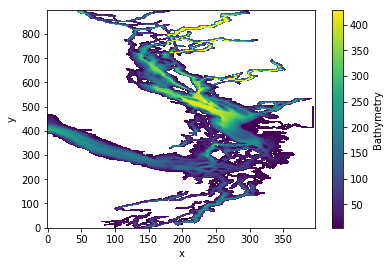

In [4]:
bathy.Bathymetry.plot()

In [5]:
strat = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/initial_strat/TSforDeepenByGridThicknessDec.nc')

In [6]:
strat

<xarray.Dataset>
Dimensions:       (deptht: 40, time_counter: 1, x: 398, y: 898)
Coordinates:
    nav_lat       (y, x) float32 46.8597 46.8615 46.8634 46.8653 46.8672 ...
    nav_lon       (y, x) float32 -123.429 -123.424 -123.419 -123.413 ...
  * deptht        (deptht) float32 0.5 1.5 2.50001 3.50003 4.50007 5.50015 ...
  * time_counter  (time_counter) float32 9.96921e+36
Dimensions without coordinates: x, y
Data variables:
    vosaline      (time_counter, deptht, y, x) float32 0.0 0.0 0.0 0.0 0.0 ...
    votemper      (time_counter, deptht, y, x) float32 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    Conventions:  CF-1.6
    title:        Salinity Temperature Initial Conditions based on Dec 2002 r...
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       https://bitbucket.org/salishsea/tools/src/tip/Find TS for n...
    references:   REQUIRED
    comment:      Salinity and Temperature conditions from Dec 2002 file for ...
    history:      [2016-0

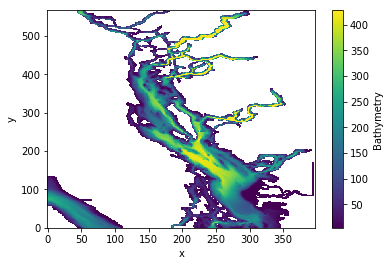

In [7]:
chopped_bathy = bathy.where(bathy.y > 330, drop = True)
chopped_bathy.Bathymetry.plot()

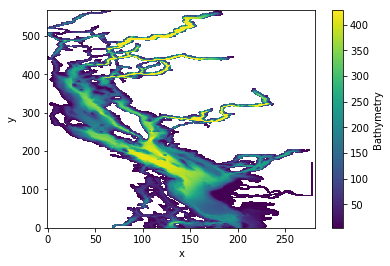

In [8]:
bathy2 = chopped_bathy.where(chopped_bathy.x > 115,drop = True)
bathy2.Bathymetry.plot()

In [9]:
coords1 = coordinates.where(coordinates.y > 335, drop = True)
coords2 = coords1.where(coords1.x > 115, drop = True)
coords2

<xarray.Dataset>
Dimensions:  (time: 1, x: 282, y: 562)
Coordinates:
  * time     (time) float32 9.96921e+36
Dimensions without coordinates: x, y
Data variables:
    nav_lon  (y, x) float32 -123.914 -123.909 -123.904 -123.899 -123.894 ...
    nav_lat  (y, x) float32 48.4059 48.4078 48.4098 48.4117 48.4137 48.4156 ...
    glamt    (time, y, x) float64 -123.9 -123.9 -123.9 -123.9 -123.9 -123.9 ...
    glamu    (time, y, x) float64 -123.9 -123.9 -123.9 -123.9 -123.9 -123.9 ...
    glamv    (time, y, x) float64 -123.9 -123.9 -123.9 -123.9 -123.9 -123.9 ...
    glamf    (time, y, x) float64 -123.9 -123.9 -123.9 -123.9 -123.9 -123.9 ...
    gphit    (time, y, x) float64 48.41 48.41 48.41 48.41 48.41 48.42 48.42 ...
    gphiu    (time, y, x) float64 48.41 48.41 48.41 48.41 48.41 48.42 48.42 ...
    gphiv    (time, y, x) float64 48.41 48.41 48.41 48.41 48.42 48.42 48.42 ...
    gphif    (time, y, x) float64 48.41 48.41 48.41 48.41 48.42 48.42 48.42 ...
    e1t      (time, y, x) float64 439.5 4

In [28]:
bathy2.to_netcdf('/data/vdo/MEOPAR/SalishSeaLake/revised_bathymetry_201702.nc')

syncing


In [29]:
coords2.to_netcdf('/data/vdo/MEOPAR/SalishSeaLake/revised_coordinates_seagrid_SalishSea201702.nc',engine='scipy')

syncing


In [12]:
new_bathy = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/revised_bathymetry_201702.nc')

In [13]:
new_bathy

<xarray.Dataset>
Dimensions:     (x: 282, y: 567)
Dimensions without coordinates: x, y
Data variables:
    nav_lon     (y, x) float64 -123.9 -123.9 -123.9 -123.9 -123.9 -123.9 ...
    nav_lat     (y, x) float64 48.39 48.39 48.39 48.39 48.39 48.4 48.4 48.4 ...
    Bathymetry  (y, x) float64 nan nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:  CF-1.6
    title:        Bathymetry 201702
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       https://bitbucket.org/salishsea/tools/src/tip/ProcessNewRiv...
    references:   NEMO-forcing/grid/bathymetry_201702.nc
    history:      [2017-04-12 16:27:28] Created netCDF4 zlib=True dataset.
    comment:      Bathymetry processed from Michaels New Full River Bathymetry

In [14]:
new_coords = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/revised_coordinates_seagrid_SalishSea201702.nc',decode_times=False)

In [15]:
new_coords

<xarray.Dataset>
Dimensions:  (time: 1, x: 282, y: 562)
Coordinates:
  * time     (time) float32 9.96921e+36
Dimensions without coordinates: x, y
Data variables:
    nav_lon  (y, x) float32 -123.914 -123.909 -123.904 -123.899 -123.894 ...
    nav_lat  (y, x) float32 48.4059 48.4078 48.4098 48.4117 48.4137 48.4156 ...
    glamt    (time, y, x) float64 -123.9 -123.9 -123.9 -123.9 -123.9 -123.9 ...
    glamu    (time, y, x) float64 -123.9 -123.9 -123.9 -123.9 -123.9 -123.9 ...
    glamv    (time, y, x) float64 -123.9 -123.9 -123.9 -123.9 -123.9 -123.9 ...
    glamf    (time, y, x) float64 -123.9 -123.9 -123.9 -123.9 -123.9 -123.9 ...
    gphit    (time, y, x) float64 48.41 48.41 48.41 48.41 48.41 48.42 48.42 ...
    gphiu    (time, y, x) float64 48.41 48.41 48.41 48.41 48.41 48.42 48.42 ...
    gphiv    (time, y, x) float64 48.41 48.41 48.41 48.41 48.42 48.42 48.42 ...
    gphif    (time, y, x) float64 48.41 48.41 48.41 48.41 48.42 48.42 48.42 ...
    e1t      (time, y, x) float64 439.5 4

In [16]:
timerange1 = ['2017-01-01','2017-02-01']
Jan_time_series = timeseries_tools.make_filename_list(timerange1,'T',model = 'nowcast-green',resolution='d')

In [17]:
Jan_data = xr.open_mfdataset(Jan_time_series)

In [18]:
Jan_data

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 31, x: 398, y: 898)
Coordinates:
    nav_lat               (y, x) float32 46.8597 46.8615 46.8634 46.8653 ...
    nav_lon               (y, x) float32 -123.429 -123.424 -123.419 -123.413 ...
  * deptht                (deptht) float32 0.5 1.5 2.50001 3.50003 4.50007 ...
    time_centered         (time_counter) datetime64[ns] 2017-01-01T12:00:00 ...
  * time_counter          (time_counter) datetime64[ns] 2017-01-01T12:00:00 ...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon            (time_counter, y, x, nvertex) float32 -123.429 ...
    bounds_lat            (time_counter, y, x, nvertex) float32 46.8597 ...
    area                  (time_counter, y, x) float32 180762.0 189238.0 ...
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 0.0 ...
    sossheig              (time_counter, y, x) float64 0.0 0.0 0.0 0.0 0.0 ...
    tim

In [32]:
averaged_Jan_data = Jan_data.mean(dim='time_counter')
averaged_Jan_data

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 40, nvertex: 4, x: 398, y: 898)
Coordinates:
    nav_lat               (y, x) float32 46.8597 46.8615 46.8634 46.8653 ...
    nav_lon               (y, x) float32 -123.429 -123.424 -123.419 -123.413 ...
  * deptht                (deptht) float32 0.5 1.5 2.50001 3.50003 4.50007 ...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon            (y, x, nvertex) float32 -123.429 -123.429 -123.429 ...
    bounds_lat            (y, x, nvertex) float32 46.8597 46.8597 46.8597 ...
    area                  (y, x) float32 180762.0 189238.0 194104.0 197344.0 ...
    deptht_bounds         (deptht, axis_nbounds) float32 0.0 1.0 1.0 2.00001 ...
    sossheig              (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    time_centered_bounds  (axis_nbounds) float64 3.694e+09 3.694e+09
    time_counter_bounds   (axis_nbounds) float64 3.694e+09 3.694e+09
    votemper              (deptht

In [30]:
timerange2 = ['2016-06-01','2016-07-01']
Jun_time_series = timeseries_tools.make_filename_list(timerange2,'T',model='nowcast-green',resolution='d')

In [31]:
Jun_data = xr.open_mfdataset(Jun_time_series)

In [33]:
averaged_Jun_data = Jun_data.mean(dim='time_counter')
averaged_Jun_data

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 40, nvertex: 4, x: 398, y: 898)
Coordinates:
  * deptht                (deptht) float32 0.5 1.5 2.50001 3.50003 4.50007 ...
    nav_lat               (y, x) float32 46.8597 46.8615 46.8634 46.8653 ...
    nav_lon               (y, x) float32 -123.429 -123.424 -123.419 -123.413 ...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    area                  (y, x) float32 180762.0 189238.0 194104.0 197344.0 ...
    bounds_lat            (y, x, nvertex) float32 46.8597 46.8597 46.8597 ...
    bounds_lon            (y, x, nvertex) float32 -123.429 -123.429 -123.429 ...
    buoy_n2               (deptht, y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    deptht_bounds         (deptht, axis_nbounds) float32 0.0 1.0 1.0 2.00001 ...
    mixed_depth           (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    sossheig              (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    time_

In [ ]:
example_strat = xr.open_dataset('home/vdo/MEOPAR/NEMO-forcing/initial_strat/')